# Intro
* Julia 공식 튜토리얼(추천) : https://julialang.org/learning/tutorials/
* 강의
    * https://juliaacademy.com/p/intro-to-julia
    * https://www.youtube.com/playlist?list=PLhQ2JMBcfAsi_3g2AFJ6B84d8c5jw5kXp
    * https://www.youtube.com/playlist?list=PLP8iPy9hna6Qpx0MgGyElJ5qFlaIXYf1R

## Check!
- 우리의 개발 환경이 올바르게 구성되어 있는지 확인

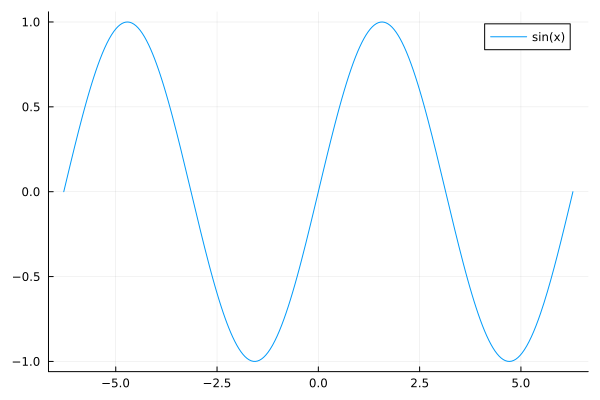

In [1]:
using Plots
plot(sin, -2π, 2π, label="sin(x)")

## Help!

In [2]:
?plot

search: plot plot! plotly plot3d Plots plot3d! plotlyjs plotattr plotarea



The main plot command. Use `plot` to create a new plot object, and `plot!` to add to an existing one:

```
    plot(args...; kw...)                  # creates a new plot window, and sets it to be the current
    plot!(args...; kw...)                 # adds to the `current`
    plot!(plotobj, args...; kw...)        # adds to the plot `plotobj`
```

There are lots of ways to pass in data, and lots of keyword arguments... just try it and it will likely work as expected. When you pass in matrices, it splits by columns. To see the list of available attributes, use the `plotattr(attr)` function, where `attr` is the symbol `:Series`, `:Subplot`, `:Plot`, or `:Axis`. Pass any attribute to `plotattr` as a String to look up its docstring, e.g., `plotattr("seriestype")`.

---

Extract a subplot from an existing plot.

# Examples

```julia-repl
julia> p1, p2 = plot(1:2), plot(10:20)
julia> pl = plot(p1, p2)  # plot containing 2 subplots

julia> plot(pl.subplots[1])  # extract 1st subplot as a standalone plot
julia> plot(pl.subplots[2])  # extract 2nd subplot as a standalone plot
```

---

REPL.Message("Extended help is available with `??`", (color = :cyan, bold = true))


## LaTeX!
- `$$ \exp(i \pi) = -1 $$`와 같은 명령어가 어색하다면 https://www.overleaf.com/learn/latex/Tutorials 을 먼저 확인하세요.

**Euler found that**

$$ \exp(i \pi) = -1 $$

## @show 매크로

In [3]:
using LinearAlgebra
x = [1,2]
y = [3,4]
@show dot(x, y);
@show x⋅y;

dot(x, y) = 11
x ⋅ y = 11


In [4]:
f(x) = x + 1
[@eval(@show(f($x))) for x = 1:3];

f(1) = 2
f(2) = 3
f(3) = 4


# Tutorial 1 : Plotting a White Noise Process

In [5]:
using LinearAlgebra, Statistics, LaTeXStrings, Plots

In [6]:
randn()

-0.016271961270662005

In [7]:
?randn

search: randn lowrankdowndate lowrankdowndate! RankDeficientException rand



```
randn([rng=GLOBAL_RNG], [T=Float64], [dims...])
```

Generate a normally-distributed random number of type `T` with mean 0 and standard deviation 1. Optionally generate an array of normally-distributed random numbers. The `Base` module currently provides an implementation for the types [`Float16`](@ref), [`Float32`](@ref), and [`Float64`](@ref) (the default), and their [`Complex`](@ref) counterparts. When the type argument is complex, the values are drawn from the circularly symmetric complex normal distribution of variance 1 (corresponding to real and imaginary part having independent normal distribution with mean zero and variance `1/2`).

# Examples

```jldoctest
julia> using Random

julia> rng = MersenneTwister(1234);

julia> randn(rng, ComplexF64)
0.6133070881429037 - 0.6376291670853887im

julia> randn(rng, ComplexF32, (2, 3))
2×3 Matrix{ComplexF32}:
 -0.349649-0.638457im  0.376756-0.192146im  -0.396334-0.0136413im
  0.611224+1.56403im   0.355204-0.365563im  0.0905552+1.31012im
```


In [8]:
randn(5)

5-element Vector{Float64}:
  0.2718652527416143
 -0.2257372777755309
 -0.22504001567994827
  0.7493227050522112
  1.1765336598283607

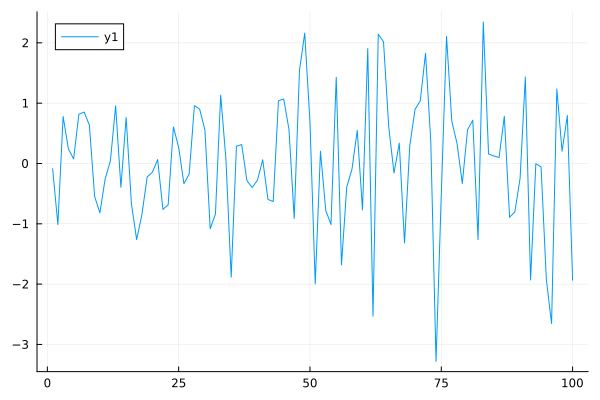

In [9]:
n = 100
ϵ = randn(n)
plot(1:n, ϵ)

## Arrays

In [10]:
ϵ[1:5]

5-element Vector{Float64}:
 -0.08674262196219734
 -1.0128409754819026
  0.7799144046725457
  0.2429702402914145
  0.07466012675482023

In [11]:
typeof(ϵ)

Vector{Float64} (alias for Array{Float64, 1})

In [12]:
?typeof

search: typeof typejoin TypeError


```
typeof(x)
```

Get the concrete type of `x`.

See also [`eltype`](@ref).

# Examples

```jldoctest
julia> a = 1//2;

julia> typeof(a)
Rational{Int64}

julia> M = [1 2; 3.5 4];

julia> typeof(M)
Matrix{Float64} (alias for Array{Float64, 2})
```


## Loop

In [13]:
# 반복문 1; 추천하지 않음
n = 100
ϵ = zeros(n)
for i in 1:n
    ϵ[i] = randn()
end

In [14]:
# 반복문 2; 반복자 활용, 추천
n = 100
ϵ = zeros(n)
for i in eachindex(ϵ)
    ϵ[i] = randn()
end

In [15]:
ϵ_sum = 0.0
m = 5
for ϵ_val in ϵ[1:m]
    ϵ_sum = ϵ_sum + ϵ_val
end
ϵ_mean = ϵ_sum / m

-0.5017124185858798

In [16]:
@show ϵ_mean ≈ mean(ϵ[1:m]);
@show ϵ_mean ≈ sum(ϵ[1:m]) / m;
@show ϵ_mean == mean(ϵ[1:m]);
@show ϵ_mean == sum(ϵ[1:m]) / m;

ϵ_mean ≈ mean(ϵ[1:m]) = true
ϵ_mean ≈ sum(ϵ[1:m]) / m = true
ϵ_mean == mean(ϵ[1:m]) = true
ϵ_mean == sum(ϵ[1:m]) / m = true


In [17]:
@show ℯ^(-π*im);
@show ℯ^(-π*im) == -1;
@show ℯ^(-π*im) ≈ -1;

ℯ ^ (-π * im) = -1.0 - 1.2246467991473532e-16im
ℯ ^ (-π * im) == -1 = false
ℯ ^ (-π * im) ≈ -1 = true


In [18]:
?isapprox

search: isapprox



```
isapprox(x, y; atol::Real=0, rtol::Real=atol>0 ? 0 : √eps, nans::Bool=false[, norm::Function])
```

Inexact equality comparison. Two numbers compare equal if their relative distance *or* their absolute distance is within tolerance bounds: `isapprox` returns `true` if `norm(x-y) <= max(atol, rtol*max(norm(x), norm(y)))`. The default `atol` is zero and the default `rtol` depends on the types of `x` and `y`. The keyword argument `nans` determines whether or not NaN values are considered equal (defaults to false).

For real or complex floating-point values, if an `atol > 0` is not specified, `rtol` defaults to the square root of [`eps`](@ref) of the type of `x` or `y`, whichever is bigger (least precise). This corresponds to requiring equality of about half of the significant digits. Otherwise, e.g. for integer arguments or if an `atol > 0` is supplied, `rtol` defaults to zero.

The `norm` keyword defaults to `abs` for numeric `(x,y)` and to `LinearAlgebra.norm` for arrays (where an alternative `norm` choice is sometimes useful). When `x` and `y` are arrays, if `norm(x-y)` is not finite (i.e. `±Inf` or `NaN`), the comparison falls back to checking whether all elements of `x` and `y` are approximately equal component-wise.

The binary operator `≈` is equivalent to `isapprox` with the default arguments, and `x ≉ y` is equivalent to `!isapprox(x,y)`.

Note that `x ≈ 0` (i.e., comparing to zero with the default tolerances) is equivalent to `x == 0` since the default `atol` is `0`.  In such cases, you should either supply an appropriate `atol` (or use `norm(x) ≤ atol`) or rearrange your code (e.g. use `x ≈ y` rather than `x - y ≈ 0`).   It is not possible to pick a nonzero `atol` automatically because it depends on the overall scaling (the "units") of your problem: for example, in `x - y ≈ 0`, `atol=1e-9` is an absurdly small tolerance if `x` is the [radius of the Earth](https://en.wikipedia.org/wiki/Earth_radius) in meters, but an absurdly large tolerance if `x` is the [radius of a Hydrogen atom](https://en.wikipedia.org/wiki/Bohr_radius) in meters.

!!! compat "Julia 1.6"
    Passing the `norm` keyword argument when comparing numeric (non-array) arguments requires Julia 1.6 or later.


# Examples

```jldoctest
julia> isapprox(0.1, 0.15; atol=0.05)
true

julia> isapprox(0.1, 0.15; rtol=0.34)
true

julia> isapprox(0.1, 0.15; rtol=0.33)
false

julia> 0.1 + 1e-10 ≈ 0.1
true

julia> 1e-10 ≈ 0
false

julia> isapprox(1e-10, 0, atol=1e-8)
true

julia> isapprox([10.0^9, 1.0], [10.0^9, 2.0]) # using `norm`
true
```

---

```
isapprox(x; kwargs...) / ≈(x; kwargs...)
```

Create a function that compares its argument to `x` using `≈`, i.e. a function equivalent to `y -> y ≈ x`.

The keyword arguments supported here are the same as those in the 2-argument `isapprox`.

!!! compat "Julia 1.5"
    This method requires Julia 1.5 or later.


---

```
isapprox(x::FixedPoint, y::FixedPoint; rtol=0, atol=max(eps(x), eps(y)))
```

For FixedPoint numbers, the default criterion is that `x` and `y` differ by no more than `eps`, the separation between adjacent fixed-point numbers.


## User-Def. FN

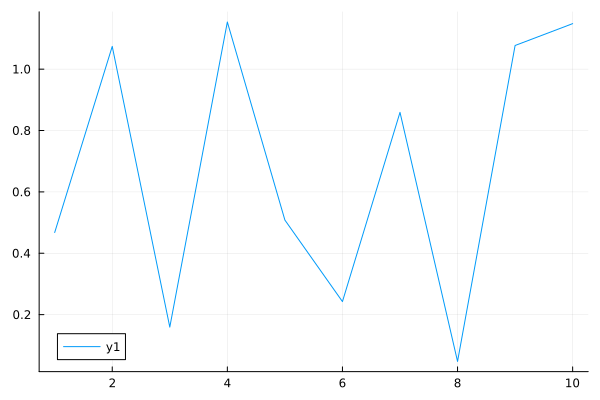

In [19]:
# 함수1
function generatedata(n)
    ϵ = zeros(n)
    for i in eachindex(ϵ)
        ϵ[i] = (randn())^2
    end
    return ϵ
end
data = generatedata(10)
plot(data)

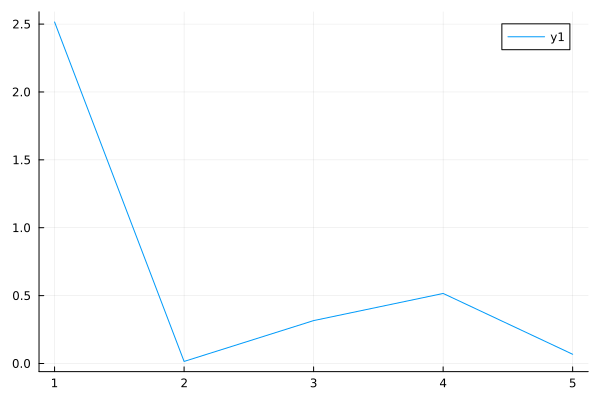

In [20]:
# 함수2
function generatedata(n)    
    ϵ = randn(n)
    return ϵ.^2
 end
data = generatedata(5)
plot(data)

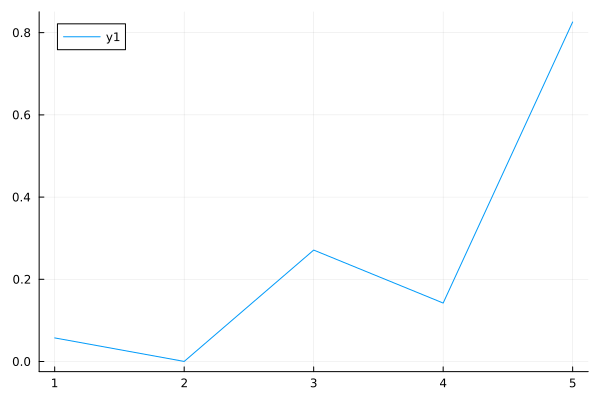

In [21]:
# 함수3
generatedata(n) = randn(n).^2
data = generatedata(5)
plot(data)

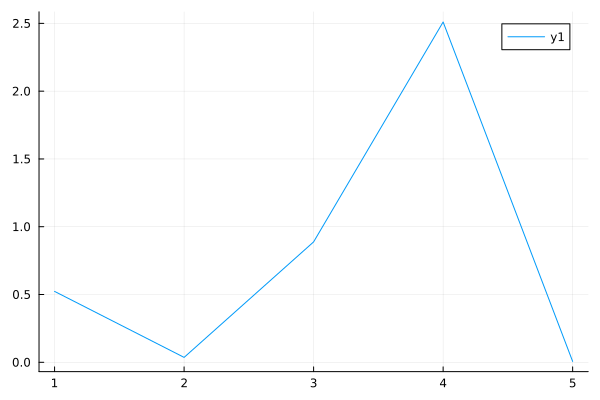

In [22]:
# 함수4
# 연구자라면 함수 합성을 활용하세요.
f(x) = x^2
generatedata(n) = f.(randn(n))
data = generatedata(5)
plot(data)

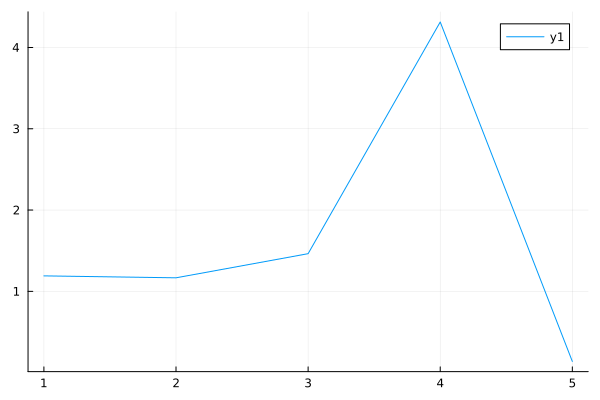

In [23]:
# 함수5
generatedata(n, gen) = gen.(randn(n))
f(x) = x^2
data = generatedata(5, f)
plot(data)

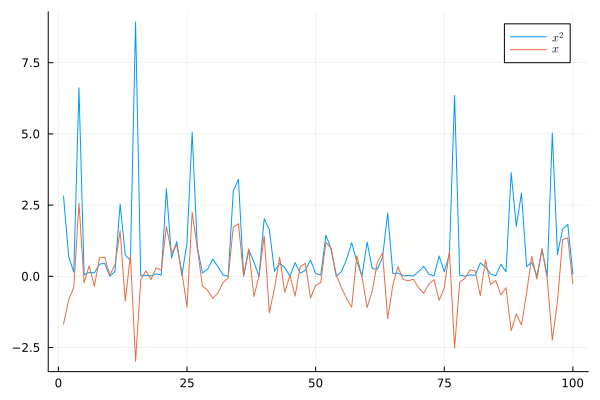

In [24]:
n = 100
f(x) = x^2
x = randn(n)

plot(f.(x), label=L"x^2")
plot!(x, label=L"x")

## 함수, 조금 더 유용하게

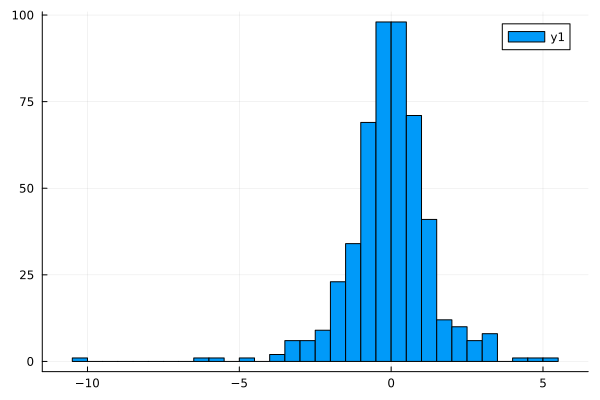

In [25]:
using Distributions

function plothistogram(distribution, n)
    ϵ = rand(distribution, n)
    histogram(ϵ)
end

lp = Laplace()
plothistogram(lp, 500)

In [26]:
?rand

search: rand randn RankDeficientException lowrankdowndate lowrankdowndate!



```
rand([rng=GLOBAL_RNG], [S], [dims...])
```

Pick a random element or array of random elements from the set of values specified by `S`; `S` can be

  * an indexable collection (for example `1:9` or `('x', "y", :z)`),
  * an `AbstractDict` or `AbstractSet` object,
  * a string (considered as a collection of characters), or
  * a type: the set of values to pick from is then equivalent to `typemin(S):typemax(S)` for integers (this is not applicable to [`BigInt`](@ref)), to $[0, 1)$ for floating point numbers and to $[0, 1)+i[0, 1)$ for complex floating point numbers;

`S` defaults to [`Float64`](@ref). When only one argument is passed besides the optional `rng` and is a `Tuple`, it is interpreted as a collection of values (`S`) and not as `dims`.

!!! compat "Julia 1.1"
    Support for `S` as a tuple requires at least Julia 1.1.


# Examples

```julia-repl
julia> rand(Int, 2)
2-element Array{Int64,1}:
 1339893410598768192
 1575814717733606317

julia> using Random

julia> rand(MersenneTwister(0), Dict(1=>2, 3=>4))
1=>2

julia> rand((2, 3))
3

julia> rand(Float64, (2, 3))
2×3 Array{Float64,2}:
 0.999717  0.0143835  0.540787
 0.696556  0.783855   0.938235
```

!!! note
    The complexity of `rand(rng, s::Union{AbstractDict,AbstractSet})` is linear in the length of `s`, unless an optimized method with constant complexity is available, which is the case for `Dict`, `Set` and dense `BitSet`s. For more than a few calls, use `rand(rng, collect(s))` instead, or either `rand(rng, Dict(s))` or `rand(rng, Set(s))` as appropriate.


---

```
rand([rng::AbstractRNG,] s::Sampleable)
```

Generate one sample for `s`.

```
rand([rng::AbstractRNG,] s::Sampleable, n::Int)
```

Generate `n` samples from `s`. The form of the returned object depends on the variate form of `s`:

  * When `s` is univariate, it returns a vector of length `n`.
  * When `s` is multivariate, it returns a matrix with `n` columns.
  * When `s` is matrix-variate, it returns an array, where each element is a sample matrix.

    rand([rng::AbstractRNG,] s::Sampleable, dim1::Int, dim2::Int...)   rand([rng::AbstractRNG,] s::Sampleable, dims::Dims)

Generate an array of samples from `s` whose shape is determined by the given dimensions.

---

```
rand(rng::AbstractRNG, d::UnivariateDistribution)
```

Generate a scalar sample from `d`. The general fallback is `quantile(d, rand())`.

---

```
rand(rng, d)
```

Extract a sample from the p-Generalized Gaussian distribution 'd'. The sampling procedure is implemented from from [1]. [1]  Gonzalez-Farias, G., Molina, J. A. D., & Rodríguez-Dagnino, R. M. (2009). Efficiency of the approximated shape parameter estimator in the generalized Gaussian distribution. IEEE Transactions on Vehicular Technology, 58(8), 4214-4223.

---

```
rand(::AbstractRNG, ::Distributions.AbstractMvNormal)
```

Sample a random vector from the provided multi-variate normal distribution.

---

```
rand(::AbstractRNG, ::Sampleable)
```

Samples from the sampler and returns the result.

---

```
rand(d::Union{UnivariateMixture, MultivariateMixture})
```

Draw a sample from the mixture model `d`.

```
rand(d::Union{UnivariateMixture, MultivariateMixture}, n)
```

Draw `n` samples from `d`.


## Tutorial 2. Variations on Fixed Points

> Take a mapping $f : X \to X$ for some set $X$. If there exists an $x^* \in X$ such that $f(x^*) = x^*$, then $x^*$: is called a "fixed point" of $f$.


### Fixed Point Maps

In [27]:
# 반복문1
p = 1.0
β = 0.9
maxiter = 1000
tolerance = 1.0E-7
v_iv = 0.8

v_old = v_iv
normdiff = Inf
iter = 1

while normdiff > tolerance && iter <= maxiter
    v_new = p + β * v_old
    normdiff = norm(v_new - v_old)    
    v_old = v_new
    iter = iter + 1
end

println("Fixed point = $v_old |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609 |f(x) - x| = 9.181037796679448e-8 in 155 iterations


In [28]:
# 반복문2
p = 1.0
β = 0.9
maxiter = 1000
tolerance = 1.0E-7
v_iv = 0.8

v_old = v_iv
normdiff = Inf
iter = 1

for i in 1:maxiter
    v_new = p + β * v_old
    normdiff = norm(v_new - v_old)
    if normdiff < tolerance
        iter = i
        break
    end
    v_old = v_new
end

println("Fixed point = $v_old |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999081896231 |f(x) - x| = 9.181037796679448e-8 in 154 iterations


In [29]:
# 함수1
function v_fp(β, ρ, v_iv, tolerance, maxiter)
    v_old = v_iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        v_new = p + β * v_old
        normdiff = norm(v_new - v_old)
        v_old = v_new
        iter = iter + 1
    end
    return (v_old, normdiff, iter)
end

p = 1.0
β = 0.9
maxiter = 1000
tolerance = 1.0E-7
v_initial = 0.8

v_star, normdiff, iter = v_fp(β, p, v_initial, tolerance, maxiter)
println("Fixed point = $v_star |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609 |f(x) - x| = 9.181037796679448e-8 in 155 iterations


In [30]:
# 함수2
function fixedpointmap(f, iv, tolerance, maxiter)
    x_old = iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        x_new = f(x_old)
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (x_old, normdiff, iter)
end

p = 1.0
β = 0.9
f(v) = p + β * v

maxiter = 1000
tolerance = 1.0E-7
v_initial = 0.8

v_star, normdiff, iter = fixedpointmap(f, v_initial, tolerance, maxiter)
println("Fixed point = $v_star |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609 |f(x) - x| = 9.181037796679448e-8 in 155 iterations


In [31]:
# 함수3
function fixedpointmap(f, iv; tolerance=1E-7, maxiter=1000)
    x_old = iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        x_new = f(x_old)
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (;value = x_old, normdiff, iter)
end

p = 1.0
β = 0.9
f(v) = p + β * v

sol = fixedpointmap(f, 0.8; tolerance=1.0E-8)
println("Fixed point = $(sol.value) |f(x) - x| = $(sol.normdiff) in $(sol.iter) iterations")

Fixed point = 9.999999918629035 |f(x) - x| = 9.041219328764782e-9 in 177 iterations


In [32]:
(;value, normdiff, iter) = fixedpointmap(f, 0.8; tolerance=1.0E-8)
println("Fixed point = $value |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999918629035 |f(x) - x| = 9.041219328764782e-9 in 177 iterations


In [33]:
# 기존 함수 활용
r = 2.0
f(x) = r * x * (1 - x)
sol = fixedpointmap(f, 0.8)
println("Fixed point = $(sol.value) |f(x) - x| = $(sol.normdiff) in $(sol.iter) iterations")

Fixed point = 0.4999999999999968 |f(x) - x| = 3.979330237546819e-8 in 7 iterations


### 패키지 활용

In [34]:
using NLsolve #fixedpoint

p = 1.0
β = 0.9
f(v) = p .+ β * v
sol = fixedpoint(f, [0.8]; m = 0)
normdiff = norm(f(sol.zero) - sol.zero)
println("Fixed point = $(sol.zero) |f(x) - x| = $normdiff in $(sol.iterations) iterations")

Fixed point = [9.999999909587816] |f(x) - x| = 9.041219328764782e-9 in 176 iterations


In [35]:
?fixedpoint

search: fixedpoint fixedpointmap



No documentation found.

`NLsolve.fixedpoint` is a `Function`.

```
# 1 method for generic function "fixedpoint":
[1] fixedpoint(f, initial_x::AbstractArray{T}; method, xtol, ftol, iterations, store_trace, show_trace, extended_trace, linesearch, factor, autoscale, m, beta, droptol, autodiff, inplace) where T in NLsolve at C:\Users\sigma\.julia\packages\NLsolve\gJL1I\src\nlsolve\fixedpoint.jl:3
```


In [36]:
p = 1.0
β = 0.9
iv = [0.8]
sol = fixedpoint(v -> p .+ β * v, iv)
fnorm = norm(f(sol.zero) - sol.zero)
println("Fixed point = $(sol.zero) |f(x) - x| = $fnorm  in $(sol.iterations) iterations converged = $(sol.f_converged)")

Fixed point = [9.999999999999972] |f(x) - x| = 3.552713678800501e-15  in 3 iterations converged = true


In [37]:
eps()

2.220446049250313e-16

In [38]:
p = 1.0
β = 0.9
iv = [BigFloat(0.8)] # higher precision

sol = fixedpoint(v -> p .+ β * v, iv)
normdiff = norm(f(sol.zero) - sol.zero)
println("Fixed point = $(sol.zero) |f(x) - x| = $normdiff in $(sol.iterations) iterations")

Fixed point = BigFloat[10.00000000000000222044604925031357388532909931412848377287867809936811555686155] |f(x) - x| = 0.0 in 3 iterations


### Multivariate Fixed Point Maps

In [39]:
p = [1.0, 2.0]
β = 0.9
iv = [0.8, 2.0]
f(v) = p .+ β * v

sol = fixedpointmap(f, iv; tolerance = 1.0E-8)
println("Fixed point = $(sol.value) |f(x) - x| = $(sol.normdiff) in $(sol.iter) iterations")

Fixed point = [9.999999961080519, 19.999999923853192] |f(x) - x| = 9.501826248250528e-9 in 184 iterations


In [40]:
using NLsolve

p = [1.0, 2.0, 0.1]
β = 0.9
iv =[0.8, 2.0, 51.0]
f(v) = p .+ β * v

sol = fixedpoint(v -> p .+ β * v, iv)
normdiff = norm(f(sol.zero) - sol.zero)
println("Fixed point = $(sol.zero) |f(x) - x| = $normdiff in $(sol.iterations) iterations")

Fixed point = [10.0, 20.000000000000004, 0.9999999999999929] |f(x) - x| = 6.661338147750939e-16 in 3 iterations


In [41]:
using NLsolve, StaticArrays

p = @SVector [1.0, 2.0, 0.1]
β = 0.9
iv = [0.8, 2.0, 51.0]
f(v) = p .+ β * v

sol = fixedpoint(v -> p .+ β * v, iv)
normdiff = norm(f(sol.zero) - sol.zero)
println("Fixmed point = $(sol.zero) |f(x) - x| = $normdiff in $(sol.iterations) iterations")

Fixmed point = [10.0, 20.000000000000004, 0.9999999999999929] |f(x) - x| = 6.661338147750939e-16 in 3 iterations
